# Data Visualization: matplotlib

This portfolio examples is aimed at showcasing my data visualization skills with matplotlib.

In [1]:
# Importing relevant libraries
import numpy as np
import pandas as pd
import datetime as dt
import pandas_datareader.data as web
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib as mpl
from matplotlib.ticker import MaxNLocator
import matplotlib.patheffects as path_effects

## Part 1. OECD: Size of the economy

The data was downloaded from OECD National Accounts Statistics (database), http://dx.doi.org/10.1787/na-data-en in a .csv format and loaded for analysis with pandas.

### Preparing data for the visualization

In [2]:
# Reading the data in
df_gdp = pd.read_csv("NAAG_GDP.csv")

In [3]:
df_gdp.head()

,LOCATION,Country,INDICATOR,Indicator,TIME,Time,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,GDPCPC,"Gross domestic product (GDP), current PPPs, bi...",2000,2000,NaN,NaN,0,Units,NaN,NaN,538.759875,NaN,NaN
1,AUS,Australia,GDPCPC,"Gross domestic product (GDP), current PPPs, bi...",2001,2001,NaN,NaN,0,Units,NaN,NaN,569.497649,NaN,NaN
2,AUS,Australia,GDPCPC,"Gross domestic product (GDP), current PPPs, bi...",2002,2002,NaN,NaN,0,Units,NaN,NaN,600.598648,NaN,NaN
3,AUS,Australia,GDPCPC,"Gross domestic product (GDP), current PPPs, bi...",2003,2003,NaN,NaN,0,Units,NaN,NaN,638.782462,NaN,NaN
4,AUS,Australia,GDPCPC,"Gross domestic product (GDP), current PPPs, bi...",2004,2004,NaN,NaN,0,Units,NaN,NaN,677.715434,NaN,NaN


In [4]:
# Creating a subset for the visualization
df_gdp_sub = df_gdp[(df_gdp["TIME"] == 2000) | (df_gdp["TIME"] == 2010) | (df_gdp["TIME"] == 2020)][['LOCATION','Country', 'TIME', 'Value']]
df_gdp_sub2 = df_gdp_sub.pivot(index=['LOCATION','Country'], columns='TIME', values='Value').reset_index()
df_gdp_sub2

TIME,LOCATION,Country,2000,2010,2020
0,AUS,Australia,538.759875,943.323281,1430.883479
1,AUT,Austria,235.380058,351.336723,510.518807
2,BEL,Belgium,284.865587,434.074826,629.598591
3,BRA,Brazil,1581.938975,2798.924733,NaN
4,CAN,Canada,901.003290,1363.578975,1796.435239
5,CHE,Switzerland,263.630222,425.995659,611.616862
6,CHL,Chile,145.355727,307.855679,478.810020
7,CHN,China (People's Republic of),3683.440252,12380.166279,24313.684922
8,COL,Colombia,262.505613,480.532035,770.955965
9,CRI,Costa Rica,31.917390,60.585846,111.177771


In [5]:
# Creating a list of OECD countries
oecd = ["Australia", "Austria", "Belgium", "Canada", "Chile", "Colombia", "Costa Rica", "Czech Republic", "Denmark", "Estonia", "Finland", "France",
"Germany", "Greece", "Hungary", "Iceland", "Ireland", "Israel", "Italy", "Japan", "Korea", "Latvia", "Lithuania", "Luxembourg", "Mexico",
"Netherlands", "New Zealand", "Norway", "Poland", "Portugal", "Slovak Republic", "Slovenia", "Spain", "Sweden", "Switzerland", "Türkiye", 
"United Kingdom", "United States"]
len(oecd)

38

In [6]:
# Creating a subset of OECD countries
df_gdp_oecd = df_gdp_sub2[df_gdp_sub2['Country'].isin(oecd)]
df_gdp_oecd = df_gdp_oecd.sort_values(by='Country')
df_gdp_oecd

TIME,LOCATION,Country,2000,2010,2020
0,AUS,Australia,538.759875,943.323281,1430.883479
1,AUT,Austria,235.380058,351.336723,510.518807
2,BEL,Belgium,284.865587,434.074826,629.598591
4,CAN,Canada,901.003290,1363.578975,1796.435239
6,CHL,Chile,145.355727,307.855679,478.810020
8,COL,Colombia,262.505613,480.532035,770.955965
9,CRI,Costa Rica,31.917390,60.585846,111.177771
10,CZE,Czech Republic,166.518688,292.042960,458.113668
12,DNK,Denmark,153.044347,238.563887,354.702681
15,EST,Estonia,13.163211,28.785368,52.433724


In [7]:
# Creating 2 lists for top and bottom OECD countries
top5 = ["United States", "Japan", "Germany", "France", "United Kingdom"]
bottom5 = ["Iceland", "Estonia", "Latvia", "Luxembourg", "Lithuania"]

In [8]:
# Creating a subset of 5 largest OECD economies
df_top = df_gdp_oecd[df_gdp_oecd['Country'].isin(top5)]
df_top

TIME,LOCATION,Country,2000,2010,2020
17,FRA,France,1589.463355,2334.643567,3252.217827
11,DEU,Germany,2236.379831,3185.384991,4696.678334
27,JPN,Japan,3461.199211,4525.401306,5241.927743
18,GBR,United Kingdom,1562.979306,2296.011231,3076.855061
44,USA,United States,10250.952000,15048.970000,21060.474000


In [9]:
# Creating a subset of 5 smallest OECD economies
df_bottom = df_gdp_oecd[df_gdp_oecd['Country'].isin(bottom5)]
df_bottom

TIME,LOCATION,Country,2000,2010,2020
15,EST,Estonia,13.163211,28.785368,52.433724
24,ISL,Iceland,8.375177,12.649994,20.029178
31,LVA,Latvia,19.036490,37.140929,62.744115
29,LTU,Lithuania,29.560652,62.244934,112.143289
30,LUX,Luxembourg,24.050965,45.808500,75.649421


In [10]:
# Creating a subset of middle OECD economies
df_middle = df_gdp_oecd[~(df_gdp_oecd['Country'].isin(top5) | df_gdp_oecd['Country'].isin(bottom5))]
df_middle

TIME,LOCATION,Country,2000,2010,2020
0,AUS,Australia,538.759875,943.323281,1430.883479
1,AUT,Austria,235.380058,351.336723,510.518807
2,BEL,Belgium,284.865587,434.074826,629.598591
4,CAN,Canada,901.003290,1363.578975,1796.435239
6,CHL,Chile,145.355727,307.855679,478.810020
8,COL,Colombia,262.505613,480.532035,770.955965
9,CRI,Costa Rica,31.917390,60.585846,111.177771
10,CZE,Czech Republic,166.518688,292.042960,458.113668
12,DNK,Denmark,153.044347,238.563887,354.702681
16,FIN,Finland,138.662265,208.934271,289.202524


### Data visualization

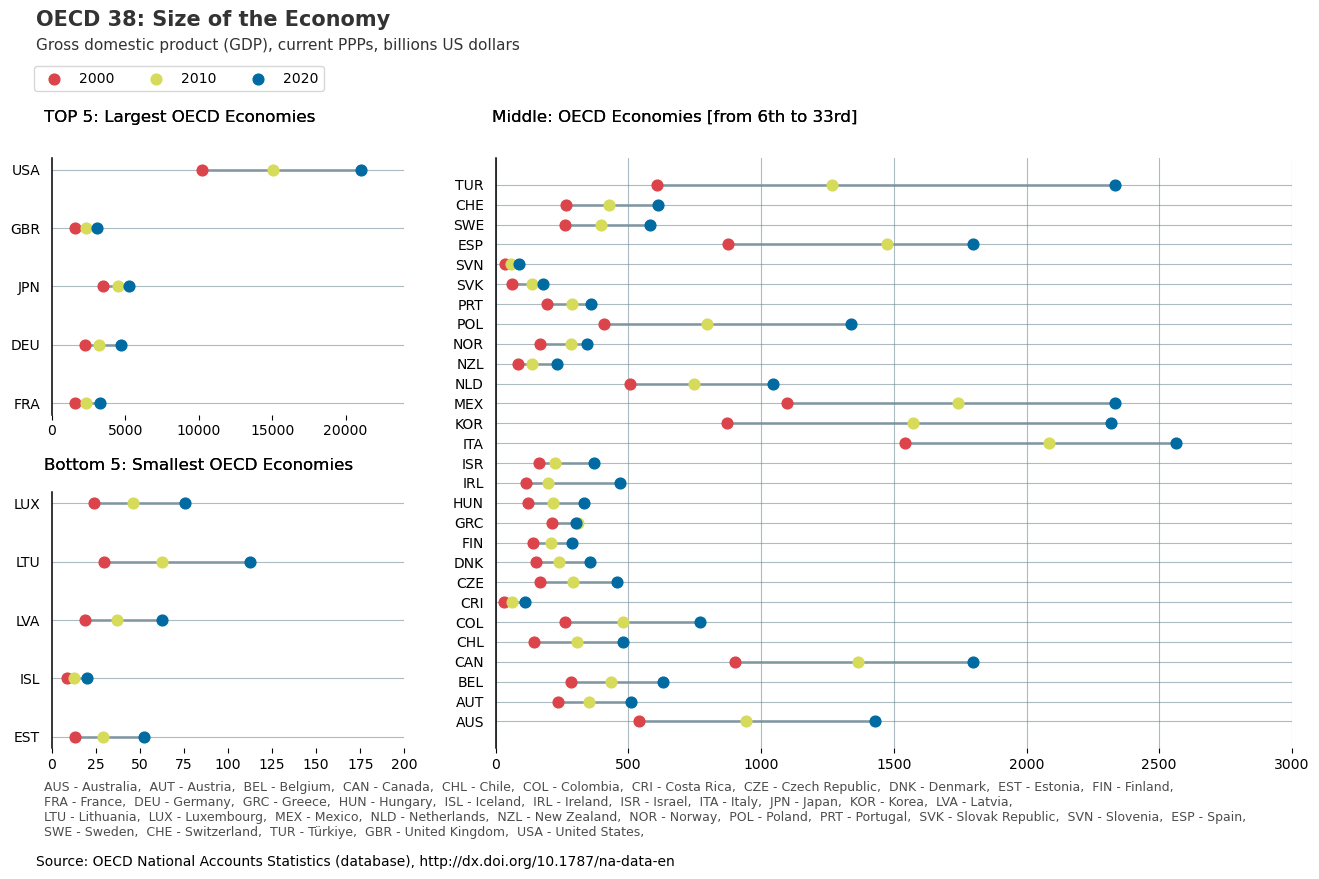

In [11]:
# Creating data visualization
fig = plt.figure(figsize=(16,12)) 

# Layout specifications
gs1 = fig.add_gridspec(nrows=3, ncols=6, wspace = 0.7, hspace=0.3) 
ax1 = fig.add_subplot(gs1[0, 0:2])
ax2 = fig.add_subplot(gs1[0:2, 2:6])
ax3 = fig.add_subplot(gs1[1:2, 0:2])

# Text elements of the visualization: Title, subtitle and footnote (source)
fig.text(x = 0.115, y = 0.99, s = "OECD 38: Size of the Economy", fontsize=15, weight='bold', alpha=.8)
fig.text(x=0.115, y=0.97, s="Gross domestic product (GDP), current PPPs, billions US dollars", ha='left', fontsize=11, alpha=.8)
fig.text(x=0.115, y=0.29, s="Source: OECD National Accounts Statistics (database), http://dx.doi.org/10.1787/na-data-en", ha='left', fontsize=10)

    ## A more complex expression where I match country codes and names and plot the text beneath as a footnote of country names and codes for readers.
fig.text(x = 0.12, y = 0.315, 
         s = ''.join(["{} - {}".format(j, i) + (',  \n' if (idx+1) % 11 == 0 else ',  ') for idx, (i, j) in enumerate(zip(list(df_gdp_oecd['Country']), list(df_gdp_oecd['LOCATION'])))]),
         ha = "left", fontsize = 9, alpha=.7)


# Plot and grid specifications
for ax in (ax1, ax2, ax3):
    ax.grid(which="major", axis='y', color='#758D99', alpha=0.6, zorder=1)
    ax.spines[['top','right','bottom']].set_visible(False) # Setting outside figure lines to invisible
    ax.spines['left'].set_linewidth(1.1) # Making left line bolder
    ax.yaxis.set_tick_params(pad=5, labelsize=10, bottom=False) # Fixing Y axis labels
    
    ax1.text(x = 0.12, y = 0.91, s = "TOP 5: Largest OECD Economies", transform=fig.transFigure, fontsize=12, alpha=.8)
    ax1.set_xlim(0, 24000)
    
    ax2.text(x = 0.4, y = 0.91, s = "Middle: OECD Economies [from 6th to 33rd]", transform=fig.transFigure, fontsize=12, alpha=.8)
    ax2.grid(which="major", axis='both', color='#758D99', alpha=0.6, zorder=1) # Adding vertical grid lines for 2nd figure
    ax2.set_xlim(0, 3000)
        
    ax3.text(x = 0.12, y = 0.62, s = "Bottom 5: Smallest OECD Economies", transform=fig.transFigure, fontsize=12, alpha=.8);
    ax3.set_xlim(0, 200)

# Ploting the data
datasets = [df_top, df_middle, df_bottom]

for ax, data in zip((ax1, ax2, ax3), datasets):
    ax.hlines(y=data['LOCATION'], xmin=data[2000], xmax=data[2020],
              color='#758D99', zorder=2, linewidth=2, label='_nolegend_', alpha=.8)

    ax.scatter(data[2000], data['LOCATION'], s=60, color='#DB444B', zorder=3)
    ax.scatter(data[2010], data['LOCATION'], s=60, color='#D7DB5A', zorder=3)
    ax.scatter(data[2020], data['LOCATION'], s=60, color='#006BA2', zorder=3)


ax.legend(['2000', '2010', '2020'], loc=(-0.05, 2.56), ncol=3);

In [12]:
# Calculating the percentage change of the economies from 2000 to 2020
df_gdp_oecd['Change'] = (((df_gdp_oecd.loc[:,df_gdp_oecd.columns.values[4]] - df_gdp_oecd.loc[:,df_gdp_oecd.columns.values[2]]) / df_gdp_oecd.loc[:,df_gdp_oecd.columns.values[4]]) * 100).round(2)
df_gdp_oecd2 = pd.DataFrame({
    "Country": df_gdp_oecd.loc[:,df_gdp_oecd.columns.values[0]],
    "Change": df_gdp_oecd.loc[:,df_gdp_oecd.columns.values[5]]})
df_gdp_oecd2.head()

,Country,Change
0,AUS,62.35
1,AUT,53.89
2,BEL,54.75
4,CAN,49.84
6,CHL,69.64


In [13]:
# Find the average data point and split the series in 2
average = df_gdp_oecd2['Change'].median()
below_average = df_gdp_oecd2[df_gdp_oecd2['Change'] < average]
above_average = df_gdp_oecd2[df_gdp_oecd2['Change']>= average]

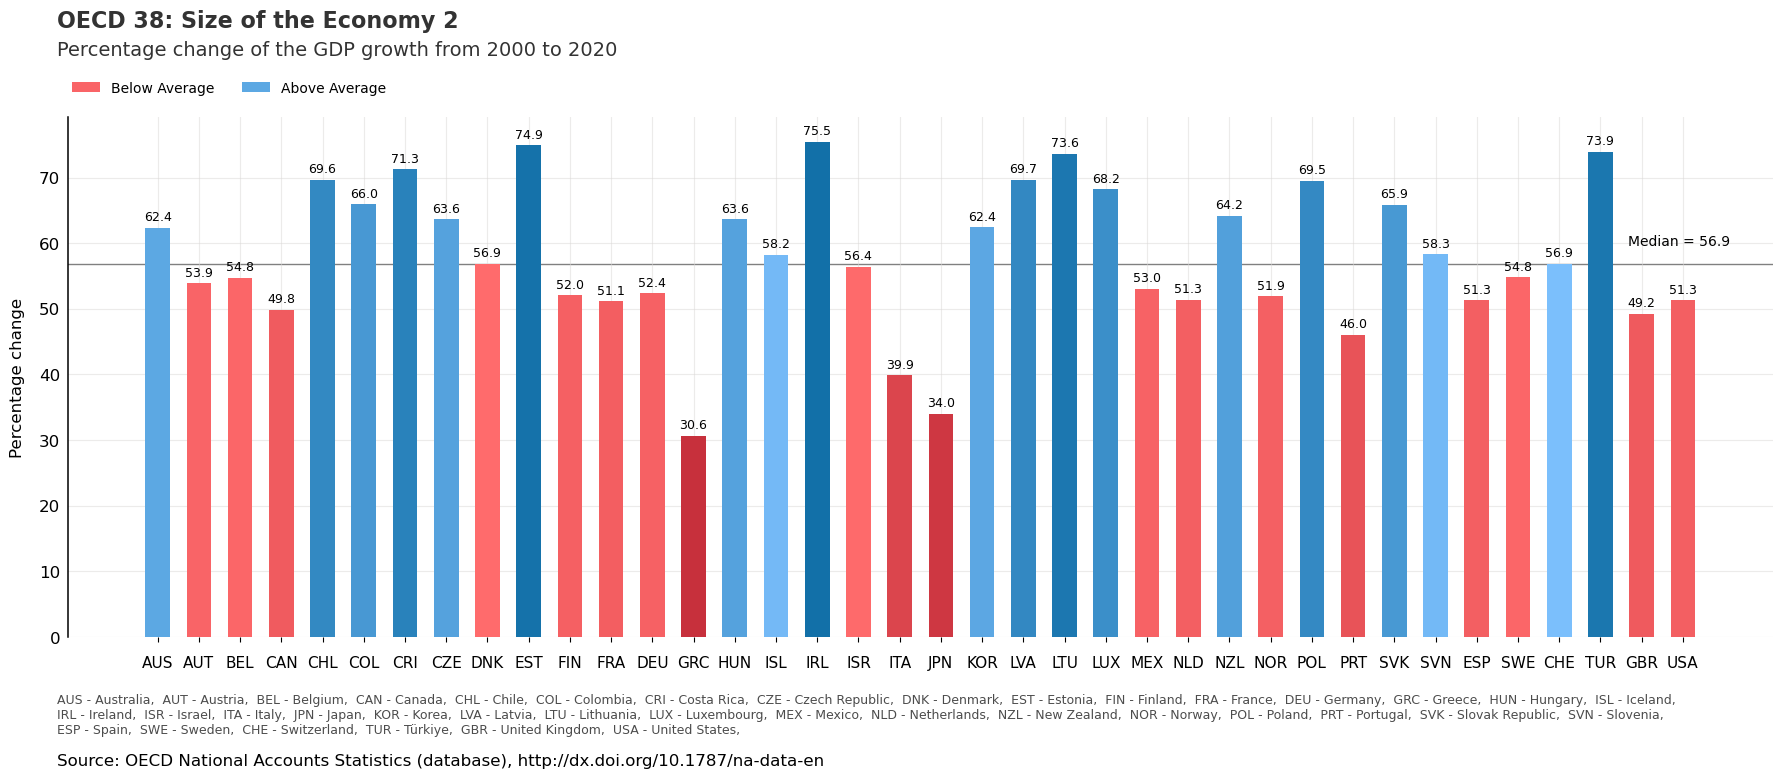

In [14]:
# Creating data visualization
fig, ax = plt.subplots(figsize = (22, 8))
fig.subplots_adjust(left=None, bottom=0.2, right=None, top=0.85, wspace=None, hspace=None)

# Text elements of the visualization: Title, subtitle and footnote (source)
ax.text(x=0.12, y=.962, s="OECD 38: Size of the Economy 2", transform=fig.transFigure, ha='left', fontsize=16, weight='bold', alpha=.8)
ax.text(x=0.12, y=.927, s="Percentage change of the GDP growth from 2000 to 2020", transform=fig.transFigure, ha='left', fontsize=14, alpha=.8)
ax.text(x=0.12, y=0.04, s="Source: OECD National Accounts Statistics (database), http://dx.doi.org/10.1787/na-data-en", transform=fig.transFigure, ha='left', fontsize=12)
ax.text(0.975, 0.76, f'Median = {average:.1f}', ha='right', va='center', transform=ax.transAxes, size=10, zorder=3)

    ## A more complex expression where I match country codes and names and plot the text beneath as a footnote of country names and codes for readers.
fig.text(x = 0.12, y = 0.08, 
         s = ''.join(["{} - {}".format(j, i) + (',  \n' if (idx+1) % 16 == 0 else ',  ') for idx, (i, j) in enumerate(zip(list(df_gdp_oecd['Country']), list(df_gdp_oecd['LOCATION'])))]),
         ha = "left", fontsize = 9, alpha=.7)


# Plot and grid specifications
ax.grid(which="major", axis='x', color='#DAD8D7', alpha=0.5, zorder=1)
ax.grid(which="major", axis='y', color='#DAD8D7', alpha=0.5, zorder=1)
ax.spines[['top','bottom', 'right']].set_visible(False)
ax.spines['left'].set_linewidth(1.1)
ax.xaxis.set_tick_params(pad=10, labelbottom=True, bottom=True, labelsize=11, labelrotation=0)
ax.yaxis.set_tick_params(pad=2, labeltop=False, labelbottom=True, bottom=False, labelsize=12)

ax.set_ylabel('Percentage change', fontsize=12, labelpad=10)

# Plotting the data
bar1 = ax.bar(df_gdp_oecd2['Country'], df_gdp_oecd2['Change'], width = 0.6)
ax.bar_label(bar1, labels=[f'{e:,.1f}' for e in df_gdp_oecd2['Change']], padding=3, color='black', fontsize=9)

# Creating a colour map
colors_high = ["#7BBFFC", "#1270A8"] 
colors_low =  ["#C7303C", "#FF6B6C"]

# Building the colour maps
cmap_low = mpl.colors.LinearSegmentedColormap.from_list("low_map", colors_low, N=256)
cmap_high = mpl.colors.LinearSegmentedColormap.from_list("high_map", colors_high, N=256)
norm_low = mpl.colors.Normalize(below_average['Change'].min(), average)
norm_high = mpl.colors.Normalize(average, above_average['Change'].max())

# Applying color maps
bar1 = ax.bar(below_average['Country'], below_average['Change'], color=cmap_low(norm_low(below_average['Change'])), width=0.6, label='Below Average', zorder=2)
bar2 = ax.bar(above_average['Country'], above_average['Change'], color=cmap_high(norm_high(above_average['Change'])), width=0.6, label='Above Average', zorder=2)
plt.axhline(y=average, color = 'grey', linewidth=1, zorder = 1)

# legend
ax.legend(ncol=2, bbox_to_anchor=[0.19, 1.08], borderaxespad=0, frameon=False, fontsize=10);

## Part 3. OECD: Growth of the economy

The data was downloaded from OECD National Accounts Statistics (database), http://dx.doi.org/10.1787/na-data-en in a .csv format and loaded for analysis with pandas.

### Preparation of data for visualization

In [15]:
# Reading the data in
df_gdpC = pd.read_csv("NAAG_GDPperCapita.csv")

In [16]:
df_gdpC.head()

,LOCATION,Country,INDICATOR,Indicator,TIME,Time,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,B8NS,"Net saving, percentage of GDP",2000,2000,NaN,NaN,0,Units,NaN,NaN,3.905101,NaN,NaN
1,AUS,Australia,B8NS,"Net saving, percentage of GDP",2001,2001,NaN,NaN,0,Units,NaN,NaN,5.165244,NaN,NaN
2,AUS,Australia,B8NS,"Net saving, percentage of GDP",2002,2002,NaN,NaN,0,Units,NaN,NaN,4.607484,NaN,NaN
3,AUS,Australia,B8NS,"Net saving, percentage of GDP",2003,2003,NaN,NaN,0,Units,NaN,NaN,5.408513,NaN,NaN
4,AUS,Australia,B8NS,"Net saving, percentage of GDP",2004,2004,NaN,NaN,0,Units,NaN,NaN,4.601341,NaN,NaN


In [17]:
df_gdpC["Indicator"].unique()

array(['Net saving, percentage of GDP',
       'GDP per capita at current prices and current PPPs, US dollars'],
      dtype=object)

In [18]:
df_gdpC_sub = df_gdpC[df_gdpC["Indicator"] == 'GDP per capita at current prices and current PPPs, US dollars'][['LOCATION', 'Country', 'TIME', 'Value']]
df_gdpC_oecd = df_gdpC_sub[df_gdpC_sub['Country'].isin(oecd)]
df_gdpC_oecd = df_gdpC_sub.sort_values(by=['Country', 'TIME'])
df_gdpC_oecd.head()

,LOCATION,Country,TIME,Value
22,AUS,Australia,2000,28312.866541
23,AUS,Australia,2001,29546.381986
24,AUS,Australia,2002,30807.514079
25,AUS,Australia,2003,32391.469994
26,AUS,Australia,2004,34000.182318


In [19]:
df_gdpC_sub_oecd2 = df_gdpC_oecd
countries = df_gdpC_sub_oecd2["Country"].unique()

In [20]:
bottom_countries = ['Mexico', 'Colombia', 'Greece', 'Costa Rica', 'Japan']
top_countries = ['Luxembourg', 'Ireland', 'Switzerland', 'Denmark', 'Lithuania']

In [21]:
df_gdpC_sub_oecd2['TIME'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
      dtype=int64)

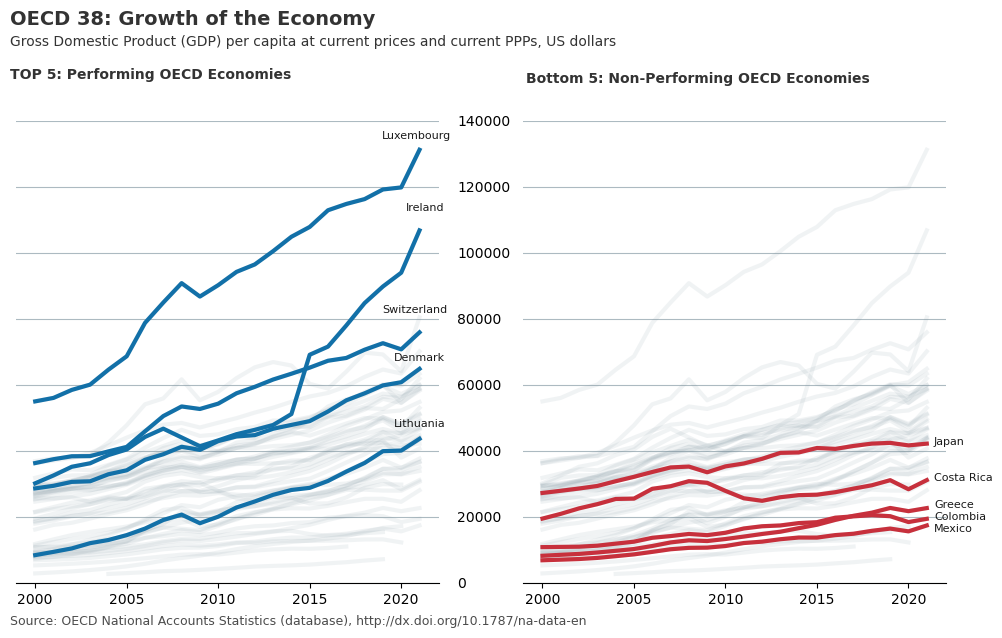

In [22]:
fig = plt.figure(figsize = (12,6))

# Layout specifications
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# Text elements of the visualization: Title, subtitle and footnote (source)
fig.text(x=0.12, y=1.04, s="OECD 38: Growth of the Economy", ha='left', fontsize=14, weight='bold', alpha=.8)
fig.text(x=0.12, y=1.005, s="Gross Domestic Product (GDP) per capita at current prices and current PPPs, US dollars", ha='left', fontsize=10, alpha=.8)
fig.text(x = 0.12, y = 0.04, s = "Source: OECD National Accounts Statistics (database), http://dx.doi.org/10.1787/na-data-en", fontsize=9, alpha=.7)

# 
ax1.text(x=0.12, y=.95, s="TOP 5: Performing OECD Economies", transform=fig.transFigure, ha='left', fontsize=10, weight='bold', alpha=.8)
ax2.text(x=0.55, y=.944, s="Bottom 5: Non-Performing OECD Economies", transform=fig.transFigure, ha='left', fontsize=10, weight='bold', alpha=.8)

# Grid specifications
for ax in (ax1, ax2):
    ax.grid(which="major", axis='y', color='#758D99', alpha=0.6, zorder=1)
    ax.spines[['top','right','left']].set_visible(False)
    ax.set_ylim(0, 140000)
    ax.yaxis.set_tick_params(pad=10, labeltop=True,labelbottom=False,  bottom=False, labelsize=10) 
ax2.set_yticklabels([])
    
# Plotting the data    
for c in countries:
    ax1.plot(df_gdpC_sub_oecd2[df_gdpC_sub_oecd2['Country'] == c]['TIME'], 
            df_gdpC_sub_oecd2[df_gdpC_sub_oecd2['Country'] == c]['Value'], 
            color='#758D99', 
            alpha=0.1, 
            linewidth=3)   
    ax2.plot(df_gdpC_sub_oecd2[df_gdpC_sub_oecd2['Country'] == c]['TIME'], 
            df_gdpC_sub_oecd2[df_gdpC_sub_oecd2['Country'] == c]['Value'], 
            color='#758D99', 
            alpha=0.1, 
            linewidth=3)
    
for t, b in zip(top_countries, bottom_countries):
    ax1.plot(df_gdpC_sub_oecd2[df_gdpC_sub_oecd2['Country'] == t]['TIME'],
             df_gdpC_sub_oecd2[df_gdpC_sub_oecd2['Country'] == t]['Value'],
             color = "#1270A8", 
             linewidth=3)
    ax2.plot(df_gdpC_sub_oecd2[df_gdpC_sub_oecd2['Country'] == b]['TIME'],
             df_gdpC_sub_oecd2[df_gdpC_sub_oecd2['Country'] == b]['Value'],
             color = '#C7303C', 
             linewidth=3)  

# Adding text elements for each emphasized line
ax1.text(x=.43, y=.85, s='Luxembourg', transform=fig.transFigure, size=8, alpha=.9)
ax1.text(x=.45, y=.73, s='Ireland', transform=fig.transFigure, size=8, alpha=.9)
ax1.text(x=.43, y=.56, s='Switzerland', transform=fig.transFigure, size=8, alpha=.9)
ax1.text(x=.44, y=.48, s='Denmark', transform=fig.transFigure, size=8, alpha=.9)
ax1.text(x=.44, y=.37, s='Lithuania', transform=fig.transFigure, size=8, alpha=.9)
     
ax2.text(x=.89, y=.195, s='Mexico', transform=fig.transFigure, size=8, alpha=.9)
ax2.text(x=.89, y=.215, s='Colombia', transform=fig.transFigure, size=8, alpha=.9)
ax2.text(x=.89, y=.235, s='Greece', transform=fig.transFigure, size=8, alpha=.9)
ax2.text(x=.89, y=.28, s='Costa Rica', transform=fig.transFigure, size=8, alpha=.9)
ax2.text(x=.89, y=.34, s='Japan', transform=fig.transFigure, size=8, alpha=.9);